#Combining the req_pidn_query + CSF_Amyloid

In [ ]:
import pandas as pd 

CSFdata = pd.read_excel("/content/CSF_Amyloid_and_Tau_Positivity_Aug_2021-1Ted.xlsx")
reqdata = pd.read_excel("/content/req_pidn_query_all_0623_02.xls")

#there are random values at the bottom of the csv that make it longer w lots of nan
reqdata = reqdata[:422]

In [ ]:
!pip install --upgrade xlrd

In [ ]:
# are they the same type?
print(type(reqdata["PIDN"][2]))

In [ ]:
# what are the differences in these age columns? is there an overlap that can be seen here?
for i in range(len(CSFdata)):
  if str(CSFdata["Age.1"][i]) != "nan" and str(CSFdata["Age.2"][i]) != "nan" :
    print("overlap")

In [ ]:
wave2 = CSFdata[CSFdata["Wave_Num"] == 2]

In [ ]:
#create a wave column for the special cases
for i in range(len(CSFdata)):
  samplenum = CSFdata["Sample"][i]
  if type(samplenum) == str:
    oldsamplenum = samplenum
    CSFdata.at[i,"Wave_Num"] = 2
    cutsample = samplenum[:samplenum.find("Wave")]
    while cutsample[0] == "0":
      cutsample = cutsample[1:]
    CSFdata.at[i,"PIDN"] = int(cutsample)
  else:
    CSFdata.at[i,"Wave_Num"] = 1
    CSFdata.at[i,"PIDN"] = int(samplenum)


In [ ]:
sum = 0
for entry in CSFdata["PIDN"]:
  if entry not in reqdata["PIDN"]:
    sum +=1
    print(entry)

In [ ]:
sum2 = 0
for entry in reqdata["PIDN"]:
  if entry not in CSFdata["PIDN"]:
    sum2 +=1

In [ ]:
reqdata

,ADRC ID,PIDN,Init _Age,Age,Sex,Education,ElapsedYears,Initial CDR,Current CDR,ChangeCDR,Init MoCA,Current MoCA,ChangeMoCA,Init Cog Stat,Current Cog Stat,ChangeCogStat,AD_MUT,IsAPOE4,APOE,"APOE_1,3_3, 2,3_4","Number of APOE e4(2, 4, 5)",Unnamed: 21,Unnamed: 22
0,3900003.0,57,79.0,84.0,male,16.0,5.0,1.0,3.0,2.0,4.0,4.0,0.0,4.0,4.0,0.0,NaN,1.0,"E3,E4",2.0,88.0,NaN,NaN
1,3900093.0,144,75.0,78.0,female,18.0,3.0,0.0,0.5,0.5,24.0,23.0,-1.0,3.0,3.0,0.0,NaN,1.0,"E4,E4",4.0,NaN,NaN,NaN
2,3900009.0,146,76.0,77.0,female,14.0,1.0,3.0,3.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,"E4,E4",4.0,NaN,NaN,NaN
3,3900224.0,181,66.0,69.0,male,20.0,3.0,0.0,0.0,0.0,23.0,28.0,5.0,3.0,3.0,0.0,NaN,0.0,"E3,E3",1.0,NaN,NaN,NaN
4,3900350.0,217,69.0,69.0,female,18.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,4.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,3900421.0,1282,69.0,69.0,male,16.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,3900422.0,1283,68.0,68.0,male,12.0,0.0,0.5,0.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,3900423.0,1284,42.0,42.0,female,14.0,0.0,1.0,1.0,0.0,10.0,10.0,0.0,4.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,3900313.0,0898+0736,62.0,64.0,female,16.0,2.0,0.0,0.0,0.0,28.0,27.0,-1.0,2.0,2.0,0.0,NaN,0.0,"E3,E3",1.0,NaN,NaN,NaN


In [ ]:
mergedDF = pd.merge(CSFdata, reqdata, on='PIDN')

In [ ]:
mergedDF

,Sample,Study,Dx,CSF Draw Date,CSF Lumipulse Date,AB+,Tau+,AB Tau Determination,Harmonized Set,CSF P-Tau181,CSF Total Tau,CSF AB42,CSF AB40,CSF AB42/AB40,Unnamed: 14,Linkcode,StudyID,Diagnosis,Age_x,isMale,Education_x,MMSE,ApoE,Unnamed: 23,PIDN,LinkCode,Age.1,Sex_x,Wave1_date,Wave2_date,Unnamed: 30,LAB_ID,Alternate_ID,Age.2,Gender,Wave_Num,ADRC ID,Init _Age,Age_y,Sex_y,Education_y,ElapsedYears,Initial CDR,Current CDR,ChangeCDR,Init MoCA,Current MoCA,ChangeMoCA,Init Cog Stat,Current Cog Stat,ChangeCogStat,AD_MUT,IsAPOE4,APOE,"APOE_1,3_3, 2,3_4","Number of APOE e4(2, 4, 5)",Unnamed: 21,Unnamed: 22
0,181,ADRC,NaN,NaT,2019-09-12,0.0,1.0,ADRC,1,103.00,690.00,2335.00,21148.0,0.110412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181,NaN,NaN,NaN,NaT,NaT,NaN,181.0,NaN,66.0,1.0,1.0,3900224.0,66.0,69.0,male,20.0,3.0,0.0,0.0,0.0,23.0,28.0,5.0,3.0,3.0,0.0,NaN,0.0,"E3,E3",1.0,NaN,NaN,NaN
1,340,ADRC,NaN,NaT,2019-09-12,1.0,1.0,ADRC,1,76.30,414.00,560.00,8165.0,0.068585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340,NaN,NaN,NaN,NaT,NaT,NaN,340.0,NaN,69.0,2.0,1.0,3900068.0,69.0,72.0,female,16.0,3.0,0.5,1.0,0.5,15.0,2.0,-13.0,4.0,4.0,0.0,NaN,1.0,"E3,E4",2.0,NaN,NaN,NaN
2,587,ADRC,NaN,NaT,2019-09-12,1.0,1.0,ADRC,1,152.70,844.00,918.00,16016.0,0.057318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,587,NaN,NaN,NaN,NaT,NaT,NaN,587.0,NaN,78.0,1.0,1.0,3900348.0,78.0,79.0,male,18.0,1.0,0.5,0.5,0.0,26.0,26.0,0.0,4.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,615,ADRC,NaN,NaT,2019-09-12,0.0,0.0,ADRC,1,41.20,412.00,629.00,7400.0,0.085000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615,NaN,NaN,NaN,NaT,NaT,NaN,615.0,NaN,86.0,1.0,1.0,3900004.0,86.0,90.0,male,20.0,4.0,0.0,0.0,0.0,28.0,30.0,2.0,2.0,3.0,1.0,NaN,0.0,"E3,E2",3.0,NaN,NaN,NaN
4,619,ADRC,NaN,NaT,2019-09-12,0.0,0.0,ADRC,1,46.00,298.00,840.00,10433.0,0.080514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619,NaN,NaN,NaN,NaT,NaT,NaN,619.0,NaN,75.0,1.0,1.0,3900005.0,75.0,79.0,male,20.0,4.0,0.0,0.0,0.0,25.0,28.0,3.0,3.0,2.0,-1.0,NaN,1.0,"E3,E4",2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,704,SAMS,HC,NaT,2020-02-26,0.0,0.0,MS SAMS (ADRC cutpoints),1,54.76,331.83,761.32,9221.9,0.082556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704,NaN,68.769863,1.0,2016-07-11,NaT,NaN,NaN,NaN,NaN,NaN,1.0,3900070.0,69.0,72.0,male,14.0,3.0,0.0,0.5,0.5,30.0,25.0,-5.0,2.0,3.0,1.0,NaN,0.0,"E3,E3",1.0,NaN,NaN,NaN
136,705,SAMS,HC,NaT,2020-02-26,1.0,1.0,MS SAMS (ADRC cutpoints),1,107.36,914.83,860.32,16043.9,0.053623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,705,NaN,73.824658,2.0,2016-06-29,NaT,NaN,NaN,NaN,NaN,NaN,1.0,3900055.0,75.0,78.0,female,14.0,3.0,0.0,0.0,0.0,28.0,25.0,-3.0,2.0,2.0,0.0,NaN,1.0,"E4,E2",5.0,NaN,NaN,NaN
137,716,SAMS,HC,NaT,2020-02-26,0.0,0.0,MS SAMS (ADRC cutpoints),1,39.66,271.83,1323.32,10839.9,0.122079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716,NaN,78.789041,2.0,2016-11-01,NaT,NaN,NaN,NaN,NaN,NaN,1.0,3900102.0,79.0,83.0,female,16.0,4.0,0.0,0.0,0.0,29.0,27.0,-2.0,2.0,3.0,1.0,NaN,0.0,"E3,E3",1.0,NaN,NaN,NaN
138,733,SAMS,HC,NaT,2020-02-26,0.0,0.0,MS SAMS (ADRC cutpoints),1,31.46,327.83,1171.32,9809.9,0.119402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733,NaN,63.800000,1.0,2016-09-30,NaT,NaN,NaN,NaN,NaN,NaN,1.0,3900089.0,64.0,67.0,male,19.0,3.0,0.0,0.0,0.0,27.0,28.0,1.0,2.0,3.0,1.0,NaN,0.0,"E3,E3",1.0,NaN,NaN,NaN


#Numbers and Visualization of the Data

In [ ]:
print(f'Len of the CSF_data file was {len(CSFdata)}')
print(f'Len of the req_data file was {len(reqdata)}')
print(f'Num of entries that were matched from both files: {len(mergedDF)}')

Len of the CSF_data file was 444
Len of the req_data file was 422
Num of entries that were matched from both files: 140


Text(0.5, 1.0, 'CSFdata Data Study Stratification')

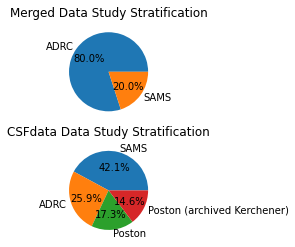

In [ ]:
import matplotlib.pyplot as plt

#figure on the studies contained in these three files

fig, axs = plt.subplots(2)

axs[0].pie(mergedDF["Study"].value_counts(), autopct = "%.1f%%", labels = list(mergedDF["Study"].value_counts().index.values))
axs[0].set_title("Merged Data Study Stratification")

axs[1].pie(CSFdata["Study"].value_counts(), autopct = "%.1f%%",labels = CSFdata["Study"].value_counts().index.values)
axs[1].set_title("CSFdata Data Study Stratification")

#Merging this file with the plasma metadata file

In [ ]:
#merging this merged dataframe with the plasma metadata file

mergedDF["SampleId"] = mergedDF["PIDN"]

plasma_meta = pd.read_csv("/content/Plasma_metadata_FINAL_052021_ADRC_additionalQC(2).csv")


In [ ]:
sum2 = 0
for entry in mergedDF["SampleId"]:
  if entry not in plasma_meta["SampleId"]:
    sum2 +=1
    print(entry)



In [ ]:
mergedDF["SampleId"] = mergedDF["SampleId"].astype(int)

newplasma = plasma_meta

for i in range(0,len(newplasma)):
  while True:
    try:
     newplasma.at["SampleId", i] = int(newplasma["SampleId"][i])
    except:
      newplasma = newplasma.drop(i)


In [ ]:
mergeDF = pd.merge(mergedDF, plasma_meta, on='SampleId')

#Merge MCI data with the inital merged file

In [ ]:
import pandas as pd

cleanMCI = pd.read_csv("/content/out_d1_req_mci_ids_0709_splitlabels-2.csv", index_col = 0)

In [ ]:
cleanMCI

,MCI-ADRCID,visit number,visit date,"d1: sec1,item3-demented",d1: sec3 symptoms,label_1_num,label_1_name,label_2_num,label_2_name,label_3_num,label_3_name,label_4_num,label_4_name,label_5_num,label_5_name,label_6_num,label_6_name,ADRC ID
0,3900006,visit_1_arm_1,11/24/15,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900006.0
1,3900006,visit_2_arm_1,11/30/16,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900006.0
2,3900006,visit_3_arm_1,12/13/17,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900006.0
3,3900006,visit_4_arm_1,12/11/18,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900006.0
4,3900006,visit_5_arm_1,2/13/20,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,3900420,visit_1_arm_1,3/25/20,0.0,"26. dep, 26 b) deptreat",26.0,dep,26b,deptreat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900420.0
191,3900422,visit_1_arm_1,8/25/20,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900422.0
192,3900426,visit_1_arm_1,4/28/21,0.0,"11. Alzheimers, 12. lbd",11.0,Alzheimers,12,lbd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900426.0
193,3900432,visit_1_arm_1,6/16/21,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900432.0


In [ ]:
cleanMCI["ADRC ID"] = cleanMCI["MCI-ADRCID"].astype(float)

In [ ]:
#dropping the wave 2 entries here
mergedDFW1 = mergedDF[mergedDF["Wave_Num"] != 2]

In [ ]:
mergedDFwMCI = pd.merge(mergedDF, cleanMCI, on='ADRC ID')

#PCA Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#run PCA on the CSF_amyloid data

cleanmergedDFwMCI = mergedDFwMCI[mergedDFwMCI["Harmonized Set"] == 1]

features = cleanmergedDFwMCI.iloc[:, 9:13].values
features = StandardScaler().fit_transform(features) 


pca= PCA(n_components=2)
pca_results = pca.fit_transform(features)

principal_DF = pd.DataFrame(data = pca_results
             , columns = ['principal component 1', 'principal component 2'])

<Figure size 432x288 with 0 Axes>

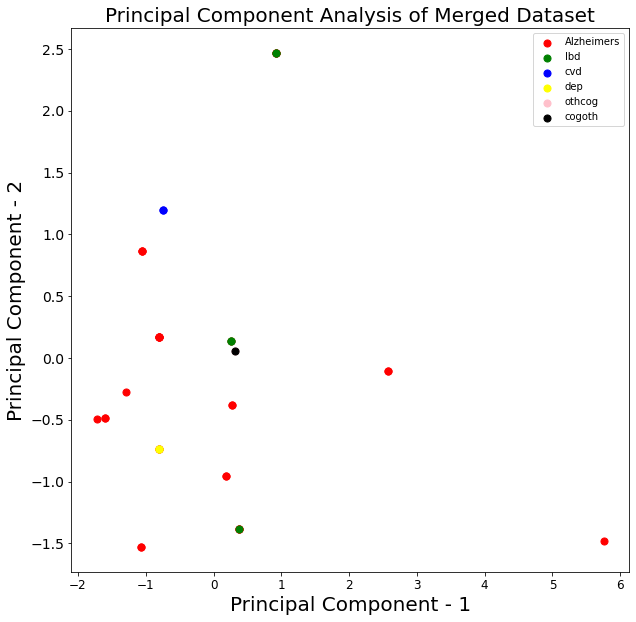

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Merged Dataset",fontsize=20)
targets = cleanmergedDFwMCI.label_1_name.value_counts().index.values
colors = ['r', 'g',"b","yellow", "pink", "black"]
for target, color in zip(targets,colors):
    indicesToKeep = cleanmergedDFwMCI['label_1_name'] == target
    plt.scatter(principal_DF.loc[indicesToKeep, 'principal component 1']
               , principal_DF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [ ]:
dxCSFdata = CSFdata[CSFdata["Dx"] != ""]
dxCSFdata = dxCSFdata[dxCSFdata["Dx"].astype(str) != "nan" ]
dxCSFdata = dxCSFdata[dxCSFdata["CSF P-Tau181"].astype(str) != "nan" ]
dxCSFdata = dxCSFdata[dxCSFdata["CSF Total Tau"].astype(str) != "nan" ]
dxCSFdata = dxCSFdata[dxCSFdata["CSF AB42"].astype(str) != "nan" ]
dxCSFdata = dxCSFdata[dxCSFdata["CSF AB40"].astype(str) != "nan" ]
dxCSFdata = dxCSFdata[dxCSFdata["CSF AB42/AB40"].astype(str) != "nan" ]

In [ ]:
dxCSFdata

,Sample,Study,Dx,CSF Draw Date,CSF Lumipulse Date,AB+,Tau+,AB Tau Determination,Harmonized Set,CSF P-Tau181,CSF Total Tau,CSF AB42,CSF AB40,CSF AB42/AB40,Unnamed: 14,Linkcode,StudyID,Diagnosis,Age,isMale,Education,MMSE,ApoE,Unnamed: 23,PIDN,LinkCode,Age.1,Sex,Wave1_date,Wave2_date,Unnamed: 30,LAB_ID,Alternate_ID,Age.2,Gender,Wave_Num
116,121254,Poston,PDD,NaT,2019-02-06,0.0,0.0,Wilson 2020 Brain,2,7.60,202.000,389.000,1783.0,0.519280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121254,NaN,NaN,NaN,NaT,NaT,NaN,121254.0,121254,67.0,2.0,1.0
117,121257,Poston,PD-MCI,NaT,2021-03-01,0.0,0.0,MS to ADRC,1,37.50,246.334,1160.333,9479.0,0.122411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121257,NaN,NaN,NaN,NaT,NaT,NaN,121257.0,NaN,62.9,2.0,1.0
118,121310,Poston,PDD,NaT,2019-02-06,1.0,1.0,Wilson 2020 Brain,2,66.40,355.000,261.000,5303.0,1.360153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121310,NaN,NaN,NaN,NaT,NaT,NaN,121310.0,121310,74.0,1.0,1.0
119,121320,Poston,PDN,NaT,2019-02-06,0.0,0.0,Wilson 2020 Brain,2,29.20,341.000,745.000,6064.0,0.457718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121320,NaN,NaN,NaN,NaT,NaT,NaN,121320.0,121320,69.0,1.0,1.0
120,121334,Poston,PDMCI,NaT,2019-02-06,1.0,0.0,Wilson 2020 Brain,2,33.70,333.000,312.000,4704.0,1.067308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121334,NaN,NaN,NaN,NaT,NaT,NaN,121334.0,121334,80.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,1080,SAMS,HC,NaT,2020-02-26,0.0,0.0,MS SAMS (ADRC cutpoints),1,29.96,207.830,967.320,8400.9,0.115145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1080,NaN,61.863014,2.0,2018-10-16,NaT,NaN,NaN,NaN,NaN,NaN,1.0
440,1083,SAMS,HC,NaT,2020-02-26,1.0,0.0,MS SAMS (ADRC cutpoints),1,71.26,483.830,1069.320,15975.9,0.066933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1083,NaN,70.712329,1.0,2018-12-04,NaT,NaN,NaN,NaN,NaN,NaN,1.0
441,1095,SAMS,HC,NaT,2020-02-26,0.0,0.0,MS SAMS (ADRC cutpoints),1,37.66,267.830,977.320,10715.9,0.091203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,64.830137,1.0,2018-12-05,NaT,NaN,NaN,NaN,NaN,NaN,1.0
442,1096,SAMS,HC,NaT,2020-02-26,0.0,0.0,MS SAMS (ADRC cutpoints),1,34.46,267.830,759.320,7041.9,0.107829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096,NaN,87.000000,1.0,2018-11-14,NaT,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
features = dxCSFdata.iloc[:, 9:14].values
features = StandardScaler().fit_transform(features) 


pca= PCA(n_components=3)
pca_results = pca.fit_transform(features)

principal_DF = pd.DataFrame(data = pca_results
             , columns = ['principal component 1', 'principal component 2', "pca3"])

In [ ]:
dxCSFdata = dxCSFdata.reset_index()

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.44484161 0.33245874 0.15230581]


<Figure size 432x288 with 0 Axes>

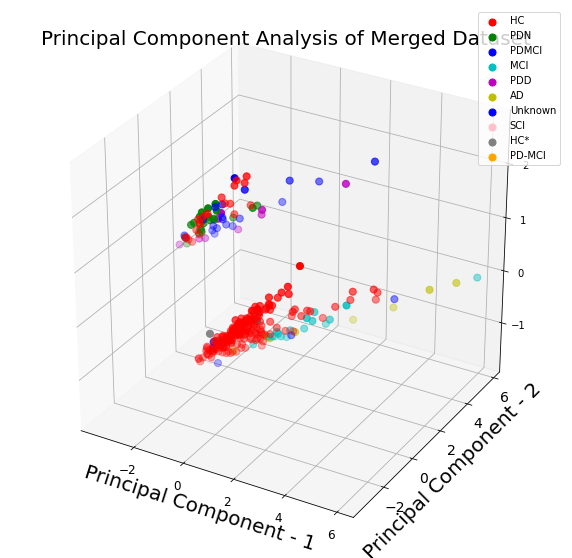

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure()
plt.figure(figsize=(10,10))

ax = plt.axes(projection = '3d')

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Merged Dataset",fontsize=20)
targets = dxCSFdata.Dx.value_counts().index.values
colors = ['r', 'g',"b", "c", "m", "y", "b", "pink", "gray", "orange"]
for target, color in zip(targets,colors):
    indicesToKeep = dxCSFdata['Dx'] == target
    ax.scatter3D(principal_DF.loc[indicesToKeep, 'principal component 1']
               , principal_DF.loc[indicesToKeep, 'principal component 2'],principal_DF.loc[indicesToKeep, 'pca3'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [ ]:
import pandas as pd

csfprot = pd.read_csv("/content/CSFProts.log10.noLODFilter(1).csv")
mcidata = pd.read_csv("/content/out_d1_req_mci_ids_0709_splitlabels-2.csv")
plasmaprot = pd.read_csv("/content/plasmaProts.log10.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
plasmaprot

,Barcode,SampleId,SampleType,CRYBB2.10000.28.3,RAF1.10001.7.3,ZNF41.10003.15.3,ELK1.10006.25.3,GUCA1A.10008.43.3,BECN1.10010.10.3,OCRL.10011.65.3,SPDEF.10012.5.3,SNAI2.10014.31.3,KCNAB2.10015.119.3,POLH.10022.207.3,VDR.10023.32.3,HOGA1.10024.44.3,DLD.10025.1.3,MUTYH.10030.8.3,DUSP4.10035.6.3,ZHX3.10036.201.3,SIGLEC12.10037.98.3,PNP.10039.32.3,TP63.10040.63.3,HNF4A.10041.3.3,SGK3.10042.8.3,BRD4.10043.31.3,WNT10A.10044.12.3,CUL3.10045.47.3,BIRC2.10046.55.3,NCF2.10047.12.3,CBFB.10048.7.3,TERF1.10049.112.3,ILK.10053.5.3,GAN.10054.3.3,FOXM1.10056.5.3,RAD23A.10058.1.3,FANCL.10063.10.3,RBBP9.10064.12.3,PIN1.10069.2.3,PLCG2.10070.22.3,...,KRT1.9931.20.3,SEMA4F.9932.49.3,ATP1B4.9933.49.3,PITPNA.9934.29.3,LNX1.9936.27.3,GJA1.9937.7.3,DUSP28.9940.35.3,PCDHB1.9941.70.3,NXT1.9942.2.3,ARMC5.9945.8.3,TOPBP1.9947.22.3,LAG3.9950.229.3,FBXL4.9951.36.3,TFAM.9952.57.3,NPIPB3.9954.2.3,RNF148.9955.40.3,ADAM15.9956.7.3,RNF114.9957.9.3,TMEM59L.9959.60.3,TBC1D5.9960.2.3,CDHR5.9962.1.3,PCDHB10.9963.19.3,MYZAP.9964.10.3,SLC22A16.9969.8.3,UBXN4.9970.7.3,CSMD2.9971.5.3,DLL3.9974.8.3,AMIGO1.9979.13.3,FAM234B.9981.18.3,PRSS35.9983.97.3,YIPF6.9984.12.3,NPW.9986.14.3,LRRC25.9987.30.3,LRRC24.9989.12.3,EMILIN3.9991.112.3,ZNF264.9993.11.3,ATP4B.9994.217.3,DUT.9995.6.3,UBXN4.9997.12.3,IRF6.9999.1.3
0,S1226889,3900001,Sample,2.661623,2.622835,2.181558,2.748421,2.715920,2.444669,3.463475,3.204093,2.931763,2.694868,2.281261,2.689841,2.787177,3.174380,2.173769,2.731750,3.234492,2.286905,3.799196,2.625210,4.338962,2.943495,2.720655,2.752586,3.188619,2.999696,2.609274,3.117768,2.651569,4.153458,2.419129,3.083108,4.261494,2.567497,3.058388,2.703549,3.175019,...,3.203658,2.615424,3.386909,3.607584,2.641077,2.803457,3.359437,3.027227,2.912966,3.186533,2.490941,3.357058,2.898890,3.897352,3.267594,2.652633,2.862251,2.680879,3.429413,3.060509,3.112303,3.052232,3.313762,3.775967,2.701913,3.831761,3.031893,3.122904,2.741152,2.699144,2.770705,3.442056,2.709355,2.627263,2.652633,2.955543,3.143951,3.412309,4.263795,3.419311
1,S1226891,516,Sample,2.693991,2.565376,2.238799,2.762754,2.667826,2.516271,3.537907,3.231673,2.905202,2.766785,2.285782,2.758458,2.816042,3.171317,2.080987,2.729893,3.441993,2.505964,3.532869,2.599665,4.449474,2.890700,2.732394,2.930949,2.950608,2.966283,2.636889,3.102571,2.640978,4.197242,2.446537,3.020982,4.137240,2.548267,3.082893,2.722716,3.150511,...,3.259307,2.682777,3.179695,3.629522,2.727541,2.832573,3.326295,3.054115,2.921374,3.237619,2.520876,3.360120,2.884285,3.987224,3.318564,2.859018,2.841985,2.690639,3.442197,3.200714,3.133411,3.075620,4.003107,3.811662,2.857995,3.829111,3.059336,2.973543,2.808886,2.780821,2.797268,3.357268,2.776338,2.620240,2.776992,3.046573,3.153266,3.242019,4.267601,3.311394
2,S1226895,619,Sample,2.723784,2.827821,2.136721,2.872273,2.636588,2.431846,3.357992,3.153388,3.149312,2.768638,2.164353,2.722140,2.776120,3.164650,2.103462,2.638888,3.363706,2.545678,3.980894,2.589950,4.307768,2.941412,2.746868,2.726156,3.218247,3.206475,2.619615,3.189911,2.621176,4.550544,2.497483,3.537756,4.544192,2.547036,3.089411,2.776411,3.459151,...,3.180040,2.607669,2.486572,3.610884,2.633266,2.796227,3.877331,2.974742,3.003417,3.175889,2.465085,3.431701,2.951872,4.370883,3.223678,2.706291,2.823539,2.691789,3.532805,3.377033,3.056714,3.138050,3.509915,3.790658,3.028205,3.990015,3.459558,2.945715,2.665206,2.671636,2.798789,3.342581,2.694781,2.535421,2.640581,2.985561,3.130334,3.828956,4.489549,3.634064
3,S1226897,3900004,Sample,2.796574,2.920645,2.186391,2.888348,2.615319,2.430720,3.230602,3.167258,2.915822,3.179925,2.088136,2.744371,2.825491,3.368547,2.129368,2.610979,3.336780,2.346939,4.352192,2.652633,4.119952,3.111531,2.923451,2.730863,3.256718,3.292588,2.809762,3.110522,2.678882,4.363838,2.459091,3.654619,4.420403,2.638290,3.222612,2.946796,3.660884,...,3.037466,2.652440,2.551206,3.633074,2.772762,2.910838,3.968917,2.988068,3.042379,3.247359,2.366610,3.327257,2.997430,4.537377,3.184407,2.723045,2.910358,2.873495,3.471218,3.645324,3.058274,3.09

In [ ]:
csfprot = csfprot.dropna(subset=['SampleId'])
csfprotint = csfprotint.loc[csfprot['SampleId'].str.match('^[+-]?\d+$', na=False)]

In [ ]:
csfprotint["SampleId"]  = csfprotint["SampleId"].astype(int)

In [ ]:
csfprotint.columns

Index(['SampleId', 'SampleType', 'CRYBB2.10000.28.3', 'RAF1.10001.7.3',
       'ZNF41.10003.15.3', 'ELK1.10006.25.3', 'GUCA1A.10008.43.3',
       'OCRL.10011.65.3', 'SPDEF.10012.5.3', 'SNAI2.10014.31.3',
       ...
       'FAM234B.9981.18.3', 'PRSS35.9983.97.3', 'YIPF6.9984.12.3',
       'NPW.9986.14.3', 'LRRC24.9989.12.3', 'ZNF264.9993.11.3',
       'ATP4B.9994.217.3', 'DUT.9995.6.3', 'UBXN4.9997.12.3', 'IRF6.9999.1.3'],
      dtype='object', length=4987)

In [ ]:
mcidata["SampleId"] = mcidata["MCI-ADRCID"]

In [ ]:
for i in mcidata["SampleId"]:
  if i in csfprotint["SampleId"]:
    print("yes")

In [ ]:
csfMCI = pd.merge(csfprotint, mcidata, on='SampleId')

In [ ]:
csfMCI

,SampleId,SampleType,CRYBB2.10000.28.3,RAF1.10001.7.3,ZNF41.10003.15.3,ELK1.10006.25.3,GUCA1A.10008.43.3,OCRL.10011.65.3,SPDEF.10012.5.3,SNAI2.10014.31.3,KCNAB2.10015.119.3,POLH.10022.207.3,VDR.10023.32.3,HOGA1.10024.44.3,MUTYH.10030.8.3,DUSP4.10035.6.3,ZHX3.10036.201.3,SIGLEC12.10037.98.3,TP63.10040.63.3,HNF4A.10041.3.3,SGK3.10042.8.3,BRD4.10043.31.3,WNT10A.10044.12.3,CUL3.10045.47.3,BIRC2.10046.55.3,NCF2.10047.12.3,CBFB.10048.7.3,TERF1.10049.112.3,ILK.10053.5.3,GAN.10054.3.3,FOXM1.10056.5.3,RAD23A.10058.1.3,FANCL.10063.10.3,RBBP9.10064.12.3,PLCG2.10070.22.3,TDP1.10073.22.3,BRD2.10074.128.3,ACBD6.10075.75.3,AP4M1.10076.1.3,BAG3.10078.5.3,...,ADAM15.9956.7.3,RNF114.9957.9.3,TMEM59L.9959.60.3,TBC1D5.9960.2.3,CDHR5.9962.1.3,PCDHB10.9963.19.3,MYZAP.9964.10.3,SLC22A16.9969.8.3,UBXN4.9970.7.3,CSMD2.9971.5.3,DLL3.9974.8.3,AMIGO1.9979.13.3,FAM234B.9981.18.3,PRSS35.9983.97.3,YIPF6.9984.12.3,NPW.9986.14.3,LRRC24.9989.12.3,ZNF264.9993.11.3,ATP4B.9994.217.3,DUT.9995.6.3,UBXN4.9997.12.3,IRF6.9999.1.3,Unnamed: 0,MCI-ADRCID,visit number,visit date,"d1: sec1,item3-demented",d1: sec3 symptoms,label_1_num,label_1_name,label_2_num,label_2_name,label_3_num,label_3_name,label_4_num,label_4_name,label_5_num,label_5_name,label_6_num,label_6_name


In [ ]:
merded = pd.read_csv("/content/mergedentries.csv")

In [ ]:
merded

,Unnamed: 0,Sample,Study,Dx,CSF Draw Date,CSF Lumipulse Date,AB+,Tau+,AB Tau Determination,Harmonized Set,CSF P-Tau181,CSF Total Tau,CSF AB42,CSF AB40,CSF AB42/AB40,Unnamed: 14,Linkcode,StudyID,Diagnosis,Age_x,isMale,Education_x,MMSE,ApoE,Unnamed: 23,PIDN,LinkCode,Age.1,Sex_x,Wave1_date,Wave2_date,Unnamed: 30,LAB_ID,Alternate_ID,Age.2,Gender,Wave_Num,ADRC ID,Init _Age,Age_y,Sex_y,Education_y,ElapsedYears,Initial CDR,Current CDR,ChangeCDR,Init MoCA,Current MoCA,ChangeMoCA,Init Cog Stat,Current Cog Stat,ChangeCogStat,AD_MUT,IsAPOE4,APOE,"APOE_1,3_3, 2,3_4","Number of APOE e4(2, 4, 5)",Unnamed: 21,Unnamed: 22
0,0,181,ADRC,NaN,NaN,2019-09-12,0.0,1.0,ADRC,1,103.00,690.00,2335.00,21148.0,0.110412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181,NaN,NaN,NaN,NaN,NaN,NaN,181.0,NaN,66.0,1.0,1.0,3900224.0,66.0,69.0,male,20.0,3.0,0.0,0.0,0.0,23.0,28.0,5.0,3.0,3.0,0.0,NaN,0.0,"E3,E3",1.0,NaN,NaN,NaN
1,1,340,ADRC,NaN,NaN,2019-09-12,1.0,1.0,ADRC,1,76.30,414.00,560.00,8165.0,0.068585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340,NaN,NaN,NaN,NaN,NaN,NaN,340.0,NaN,69.0,2.0,1.0,3900068.0,69.0,72.0,female,16.0,3.0,0.5,1.0,0.5,15.0,2.0,-13.0,4.0,4.0,0.0,NaN,1.0,"E3,E4",2.0,NaN,NaN,NaN
2,2,587,ADRC,NaN,NaN,2019-09-12,1.0,1.0,ADRC,1,152.70,844.00,918.00,16016.0,0.057318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,587,NaN,NaN,NaN,NaN,NaN,NaN,587.0,NaN,78.0,1.0,1.0,3900348.0,78.0,79.0,male,18.0,1.0,0.5,0.5,0.0,26.0,26.0,0.0,4.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,615,ADRC,NaN,NaN,2019-09-12,0.0,0.0,ADRC,1,41.20,412.00,629.00,7400.0,0.085000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615,NaN,NaN,NaN,NaN,NaN,NaN,615.0,NaN,86.0,1.0,1.0,3900004.0,86.0,90.0,male,20.0,4.0,0.0,0.0,0.0,28.0,30.0,2.0,2.0,3.0,1.0,NaN,0.0,"E3,E2",3.0,NaN,NaN,NaN
4,4,619,ADRC,NaN,NaN,2019-09-12,0.0,0.0,ADRC,1,46.00,298.00,840.00,10433.0,0.080514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619,NaN,NaN,NaN,NaN,NaN,NaN,619.0,NaN,75.0,1.0,1.0,3900005.0,75.0,79.0,male,20.0,4.0,0.0,0.0,0.0,25.0,28.0,3.0,3.0,2.0,-1.0,NaN,1.0,"E3,E4",2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,135,704,SAMS,HC,NaN,2020-02-26,0.0,0.0,MS SAMS (ADRC cutpoints),1,54.76,331.83,761.32,9221.9,0.082556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704,NaN,68.769863,1.0,2016-07-11,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3900070.0,69.0,72.0,male,14.0,3.0,0.0,0.5,0.5,30.0,25.0,-5.0,2.0,3.0,1.0,NaN,0.0,"E3,E3",1.0,NaN,NaN,NaN
136,136,705,SAMS,HC,NaN,2020-02-26,1.0,1.0,MS SAMS (ADRC cutpoints),1,107.36,914.83,860.32,16043.9,0.053623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,705,NaN,73.824658,2.0,2016-06-29,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3900055.0,75.0,78.0,female,14.0,3.0,0.0,0.0,0.0,28.0,25.0,-3.0,2.0,2.0,0.0,NaN,1.0,"E4,E2",5.0,NaN,NaN,NaN
137,137,716,SAMS,HC,NaN,2020-02-26,0.0,0.0,MS SAMS (ADRC cutpoints),1,39.66,271.83,1323.32,10839.9,0.122079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716,NaN,78.789041,2.0,2016-11-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3900102.0,79.0,83.0,female,16.0,4.0,0.0,0.0,0.0,29.0,27.0,-2.0,2.0,3.0,1.0,NaN,0.0,"E3,E3",1.0,NaN,NaN,NaN
138,138,733,SAMS,HC,NaN,2020-02-26,0.0,0.0,MS SAMS (ADRC cutpoints),1,31.46,327.83,1171.32,9809.9,0.119402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733,NaN,63.800000,1.0,2016-09-30,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3900089.0,64.0,67.0,male,19.0,3.0,0.0,0.0,0.0,27.0,28.0,1.0,2.0,3.0,1.0,NaN,0.0,"E3,E3",1.0,NaN,NaN,NaN


In [ ]:
mcidata["ADRC_ID"] = mcidata["MCI-ADRCID"].astype(float)
mergedDFwMCI = pd.merge(merded, mcidata, on='ADRC ID')

In [ ]:
import pandas as pd
plasmaMeta = pd.read_csv("/content/Plasma_metadata_FINAL_052021_ADRC_additionalQC(2).csv")

In [ ]:
plasmaMeta = plasmaMeta[(plasmaMeta["Study"] == "ADRC") & (plasmaMeta["Diagnosis_group"] == "MCI")]

In [ ]:
plasmaMCI = plasmaMeta[plasmaMeta["Diagnosis_group"] == "MCI"]

In [ ]:
plasmaMCI["Study"].value_counts()

ADRC    133
Name: Study, dtype: int64

In [ ]:
neededIDs = set(plasmaMeta["ADRC_ID"])

In [ ]:
mci = pd.read_csv("/content/out_d1_req_mci_ids_0709_splitlabels-2.csv")

In [ ]:
actualIDs = set(mci["MCI-ADRCID"])

In [ ]:
missing = list(neededIDs-actualIDs)

In [ ]:
what = list(actualIDs-neededIDs)

In [ ]:
what

[3900164, 3900393, 3900426, 3900397, 3900432, 3900433, 3900217, 3900090]

In [ ]:
df = pd.DataFrame(what)

81

In [ ]:
df.to_csv("missing_MCI-ADRC.csv")

In [ ]:
mcidata["ADRC_ID"] = mcidata["MCI-ADRCID"].astype(float)

plamsmaMetaMCI = pd.merge(plasmaMeta, mcidata, on='ADRC_ID')

In [ ]:
plamsmaMetaMCI = plamsmaMetaMCI.dropna(subset=['SampleID'])
plamsmaMetaMCIint = plamsmaMetaMCI.loc[plamsmaMetaMCI['SampleID'].str.match('^[+-]?\d+$', na=False)]
plamsmaMetaMCIint["SampleID"]  = plamsmaMetaMCIint["SampleID"].astype(int)

In [ ]:
csfprotint["SampleID"] = csfprotint["SampleId"]
protsMerge = pd.merge(plamsmaMetaMCIint, csfprotint, on='SampleID')

In [ ]:
cols = list(protsMerge.columns)

In [ ]:
for i in range(0,len(cols)):
  if cols[i] == "CRYBB2.10000.28.3":
    print(i)

85


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#run PCA on the CSF_amyloid data


features = protsMerge.iloc[:, 85:].values
features = StandardScaler().fit_transform(features) 


pca= PCA(n_components=3)
pca_results = pca.fit_transform(features)

principal_DF = pd.DataFrame(data = pca_results
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

<Figure size 432x288 with 0 Axes>

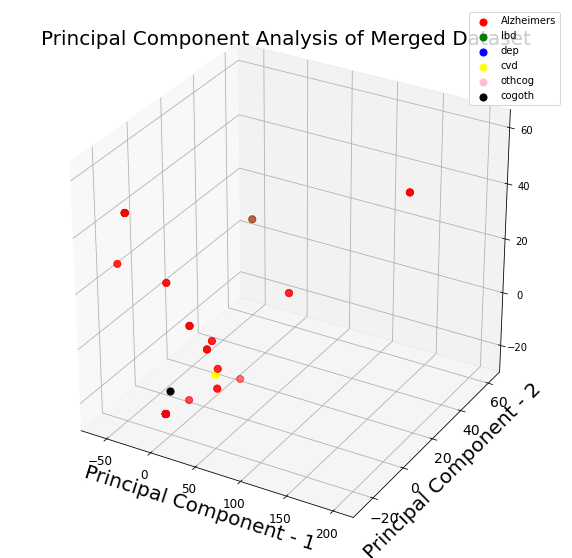

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(10,10))

ax = plt.axes(projection = '3d')

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Merged Dataset",fontsize=20)
targets = protsMerge.label_1_name.value_counts().index.values
colors = ['r', 'g',"b","yellow", "pink", "black"]
for target, color in zip(targets,colors):
    indicesToKeep = protsMerge['label_1_name'] == target
    ax.scatter3D(principal_DF.loc[indicesToKeep, 'principal component 1']
               , principal_DF.loc[indicesToKeep, 'principal component 2'],principal_DF.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [ ]:
principal_DF

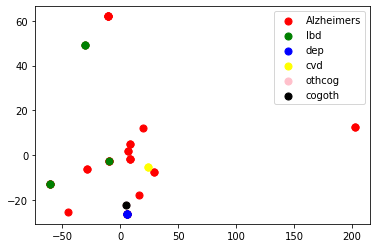

In [ ]:
for target, color in zip(targets,colors):
    indicesToKeep = protsMerge['label_1_name'] == target
    plt.scatter(principal_DF.loc[indicesToKeep, 'principal component 1']
               , principal_DF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [ ]:
mcidata

,Unnamed: 0,MCI-ADRCID,visit number,visit date,"d1: sec1,item3-demented",d1: sec3 symptoms,label_1_num,label_1_name,label_2_num,label_2_name,label_3_num,label_3_name,label_4_num,label_4_name,label_5_num,label_5_name,label_6_num,label_6_name,SampleId,ADRC ID,ADRC_ID
0,0,3900006,visit_1_arm_1,11/24/15,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900006,3900006.0,3900006.0
1,1,3900006,visit_2_arm_1,11/30/16,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900006,3900006.0,3900006.0
2,2,3900006,visit_3_arm_1,12/13/17,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900006,3900006.0,3900006.0
3,3,3900006,visit_4_arm_1,12/11/18,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900006,3900006.0,3900006.0
4,4,3900006,visit_5_arm_1,2/13/20,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900006,3900006.0,3900006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,3900420,visit_1_arm_1,3/25/20,0.0,"26. dep, 26 b) deptreat",26.0,dep,26b,deptreat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900420,3900420.0,3900420.0
191,191,3900422,visit_1_arm_1,8/25/20,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900422,3900422.0,3900422.0
192,192,3900426,visit_1_arm_1,4/28/21,0.0,"11. Alzheimers, 12. lbd",11.0,Alzheimers,12,lbd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900426,3900426.0,3900426.0
193,193,3900432,visit_1_arm_1,6/16/21,0.0,11. Alzheimers,11.0,Alzheimers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900432,3900432.0,3900432.0
